    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
0.9
[0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 0]
[[48  4]
 [ 4 24]]
confusion  matrix without normalization
[[48  4]
 [ 4 24]]


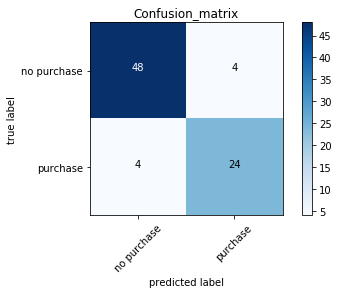

In [2]:
import numpy as np
import pandas as pd


dataset =pd.read_csv('/home/moritz/Downloads/Social_Network_Ads.csv')
X= dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,4].values


print(dataset.head())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train ,y_test = train_test_split(X, y,test_size=0.2)


# normalization is being done, i.e feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# print(X_train)

# fitting(i.e training the knn model)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)

print(acc)

predicted = model.predict(X_test)

print(predicted)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted)
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='confusion_matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('confusion  matrix without normalization')
    print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')


cm_plot_labels = ['no purchase', 'purchase']

plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')

